# MA333 大数据导论 课程项目报告

## 背景

美国的犯罪率一向居高不下，不同行政区域的行政手段对犯罪率有很明显的影响，不同犯罪类型出现的时间也有较大不同。在本次Project中，我们希望通过一些数据分析方法得到犯罪事件与地区、时间的关系，从而达到了解DC地区不同街区犯罪情况，划分地域危险程度的目的。生命财产安全，是人们选择居住区的一个重要指标，我们也希望通过对犯罪情况和不同类型房产价格的分析得出房屋价格与地区犯罪情况的关系。


## 预处理

读入数据，将原始数据存入CRIMES和RPOPERTIES。

In [26]:
# 读入
import lets_plot
import pandas as pd
import numpy as np


PROPERTIES = pd.read_csv('data/DC_Properties.csv').reset_index()
PROPERTIES.drop(PROPERTIES[['Unnamed: 0']], axis=1, inplace=True)
print(PROPERTIES.columns)
PROPERTIES.set_index('index')

CRIMES = pd.read_csv('data/DC_Crime.csv').reset_index()
print(CRIMES.columns)
CRIMES.set_index('index')

/home/wycer/miniconda3/envs/bigdata/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
Index(['index', 'BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS',
       'BEDRM', 'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'PRICE',
       'QUALIFIED', 'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE',
       'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES',
       'USECODE', 'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'CMPLX_NUM',
       'LIVING_GBA', 'FULLADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'NATIONALGRID',
       'LATITUDE', 'LONGITUDE', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD',
       'CENSUS_TRACT', 'CENSUS_BLOCK', 'WARD', 'SQUARE', 'X', 'Y', 'QUADRANT'],
      dtype='object')
Index(['index', 'NEIGHBORHOOD_CLUSTER', 'CENSUS_TRACT', 'offensegro

,NEIGHBORHOOD_CLUSTER,CENSUS_TRACT,offensegroup,LONGITUDE,END_DATE,offense-text,SHIFT,YBLOCK,DISTRICT,WARD,...,BLOCK,START_DATE,CCN,OFFENSE,OCTO_RECORD_ID,ANC,REPORT_DAT,METHOD,location,LATITUDE
index,,,,,,,,,,,,,,,,,,,,,
0,cluster 21,8702.0,property,-77.003574,2017-04-29T08:00:23.000,theft f/auto,day,138139.0,5.0,5.0,...,150 - 299 block of q street ne,2017-04-29T01:30:14.000,17070672,theft f/auto,17070672-01,5E,2017-04-29T13:49:31.000Z,others,"38.911121322949178,-77.003576581965632",38.911114
1,cluster 16,1600.0,property,-77.026557,2017-04-29T08:30:37.000,theft f/auto,day,146051.0,4.0,4.0,...,7600 - 7699 block of georgia avenue nw,2017-04-29T02:30:10.000,17070675,theft f/auto,17070675-01,4A,2017-04-29T14:38:59.000Z,others,"38.982391883146363,-77.026559339798794",38.982384
2,cluster 8,4702.0,property,-77.020913,2017-04-29T11:10:57.000,theft/other,day,137185.0,1.0,6.0,...,600 - 699 block of k street nw,2017-04-29T10:43:33.000,17070714,theft/other,17070714-01,6E,2017-04-29T15:19:02.000Z,others,"38.902525540064957,-77.020915170313728",38.902518
3,cluster 31,7808.0,property,-76.919601,2017-04-28T09:30:33.000,theft/other,day,135903.0,6.0,7.0,...,5715 5739 block of blaine street ne,2017-04-28T09:15:27.000,17070736,theft/other,17070736-01,7C,2017-04-29T16:11:44.000Z,others,"38.890951021927407,-76.919603310082607",38.890943
4,cluster 39,10900.0,property,-77.003927,2017-04-29T13:42:11.000,theft/other,day,128340.0,7.0,8.0,...,4610 - 4659 block of south capitol street,2017-04-29T13:03:40.000,17070780,theft/other,17070780-01,8D,2017-04-29T18:17:15.000Z,others,"38.822847890448664,-77.003929146312586",38.822840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449198,cluster 22,11100.0,property,-76.977167,2021-03-17T20:20:07.000,theft/other,evening,139268.0,5.0,5.0,...,1815 - 1999 block of bryant street ne,2021-03-17T20:15:08.000,21034375,theft/other,21034375-01,5C,2021-03-17T21:07:30.000,others,"38.9212817635688,-76.9771673661107",38.921282
449199,cluster 6,5201.0,property,-77.035546,2021-03-17T17:20:33.000,motor vehicle theft,evening,137976.0,2.0,2.0,...,1500 - 1599 block of p street nw,2021-03-16T21:00:41.000,21034386,motor vehicle theft,21034386-01,2B,2021-03-17T21:38:51.000,others,"38.9096398205834,-77.0355462229667",38.909640
449200,cluster 23,8802.0,property,-76.982015,2021-03-17T23:09:20.000,theft/other,midnight,137150.0,5.0,5.0,...,900 - 999 block of bladensburg road ne,2021-03-17T22:21:45.000,21034407,theft/other,21034407-01,5D,2021-03-18T01:12:46.000,others,"38.9022029472732,-76.9820154636605",38.902203


## 数据可视化以及寻找数据关系

### 查看犯罪数量随时间变化的情况

In [3]:
# 删去重复的数据
crimes = CRIMES.drop_duplicates(inplace=False)

from lets_plot import *

LetsPlot.setup_html()

p = ggplot(crimes, aes(x='YEAR')) + ggsize(500, 250)
p + geom_histogram(binwidth=.5)
p + geom_histogram(
    aes(y='..density..'), binwidth=.5, colour="black", fill="white")


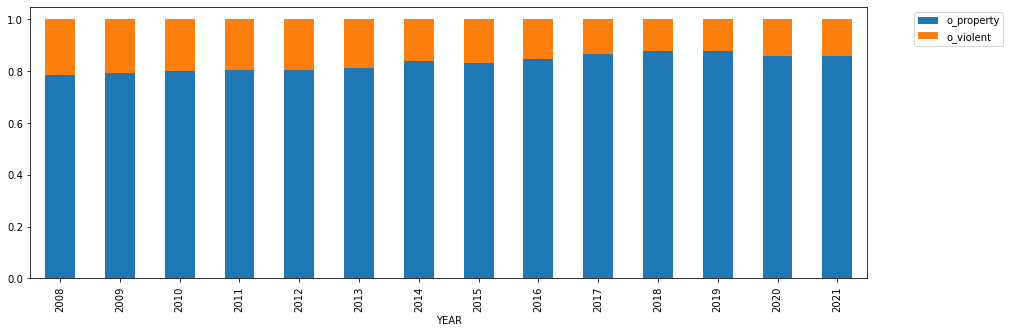

In [34]:
### 查看犯罪类型随时间年份的情况
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = [15, 5]

# 构建数据
crimes = CRIMES.drop_duplicates(inplace=False)
crimes = crimes[crimes['YEAR'].notna()]
crimes.set_index('YEAR')
crimes = crimes[['YEAR', 'offensegroup']]
crimes = pd.get_dummies(crimes, columns=["offensegroup"], prefix="o")

data_set = crimes.groupby('YEAR').sum()
data_set = data_set.div(data_set.sum(axis=1), axis=0)
data_set.head(10)

data_set.plot(kind='bar', stacked = True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


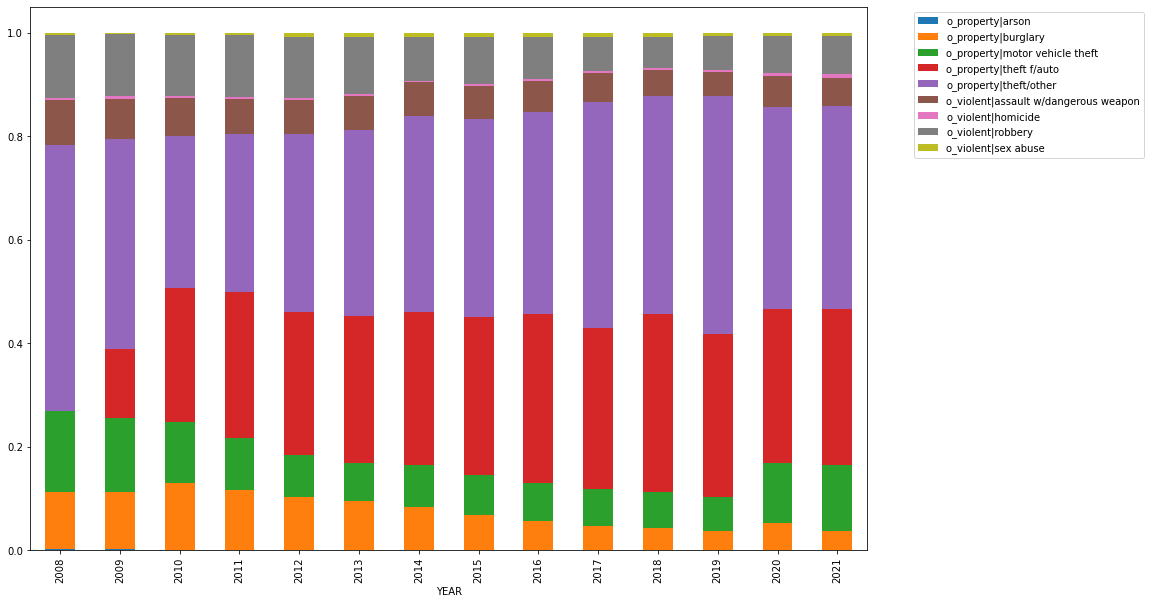

In [35]:
### 查看犯罪详细类型随年份变化的情况
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = [15, 10]

# 构建数据
crimes = CRIMES.drop_duplicates(inplace=False)
crimes = crimes[crimes['YEAR'].notna()]
crimes.set_index('YEAR')
crimes = crimes[['YEAR', 'offensekey']]
crimes = pd.get_dummies(crimes, columns=["offensekey"], prefix="o")

data_set = crimes.groupby('YEAR').sum()
data_set = data_set.div(data_set.sum(axis=1), axis=0)
data_set.head(10)

data_set.plot(kind='bar', stacked = True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


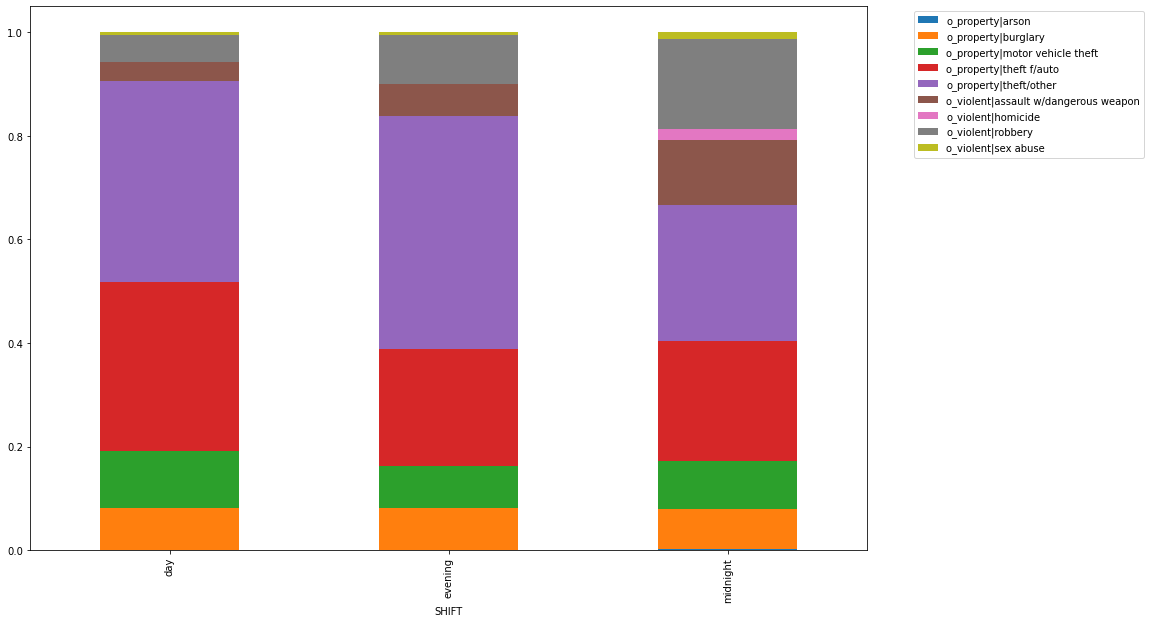

In [33]:
### 查看犯罪详细类型随时间变化的情况
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = [15, 10]

# 构建数据
crimes = CRIMES.drop_duplicates(inplace=False)
crimes = crimes[crimes['SHIFT'].notna()]
crimes.set_index('SHIFT')
crimes = crimes[['SHIFT', 'offensekey']]
crimes = pd.get_dummies(crimes, columns=["offensekey"], prefix="o")

data_set = crimes.groupby('SHIFT').sum()
data_set = data_set.div(data_set.sum(axis=1), axis=0)
data_set.head(10)

data_set.plot(kind='bar', stacked = True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## 数据相关性分析

### 不同类型犯罪的出现与时间、犯罪方式的相关性

In [9]:
# 犯罪类型/方法/时间
from lets_plot import *
from lets_plot.bistro.corr import *

LetsPlot.setup_html()

df = crimes[["offensegroup", "SHIFT", "offensekey", "METHOD"]]

mpg_df = pd.get_dummies(df, columns=["offensegroup", "SHIFT", "offensekey", "METHOD"])
corr_plot(mpg_df).tiles().labels().build() + ggtitle("Tiles and labels")

从图中可以发现：

1. 谋杀类型的犯罪与午夜时间有弱正相关，与其余时间均为负相关。
2. 抢劫类型的犯罪与午夜有正相关，与白天有负相关。
3. 性犯罪则与时间并无明显的相关关系。
4. 犯罪物品中与枪支和刀相关的犯罪，与暴力犯罪（抢劫、谋杀）有强正相关关系。
5. 犯罪物品中与枪支相关的犯罪，与犯罪类型是抢劫或谋杀呈强正相关关系。

### 犯罪事件与地理位置的相关性

In [ ]:
def snapshot(df):
    # 查看所有行
    print(df)

    # 查看前 5 行
    print(df.head())
    print(df.head(5))

    # 查看后 5 行
    print(df.tail())
    print(df.tail(5))

    # 查看行标签(index)，列标签(columns)和数据
    print(df.index)
    print(df.index.names)
    print(df.columns)
    print(df.values)

    # 查看基本统计信息
    print(df.info())
    print(df.describe())

<ipython-input-28-da30da33841e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['count_by_cluster'] = 1
<ipython-input-28-da30da33841e>:37: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  merged.apply(lambda x: ax.annotate(s=f"{x['neighbourhood']}:{x['count_by_cluster']}", xy=x.geometry.centroid.coords[0], ha='center'),axis=1)


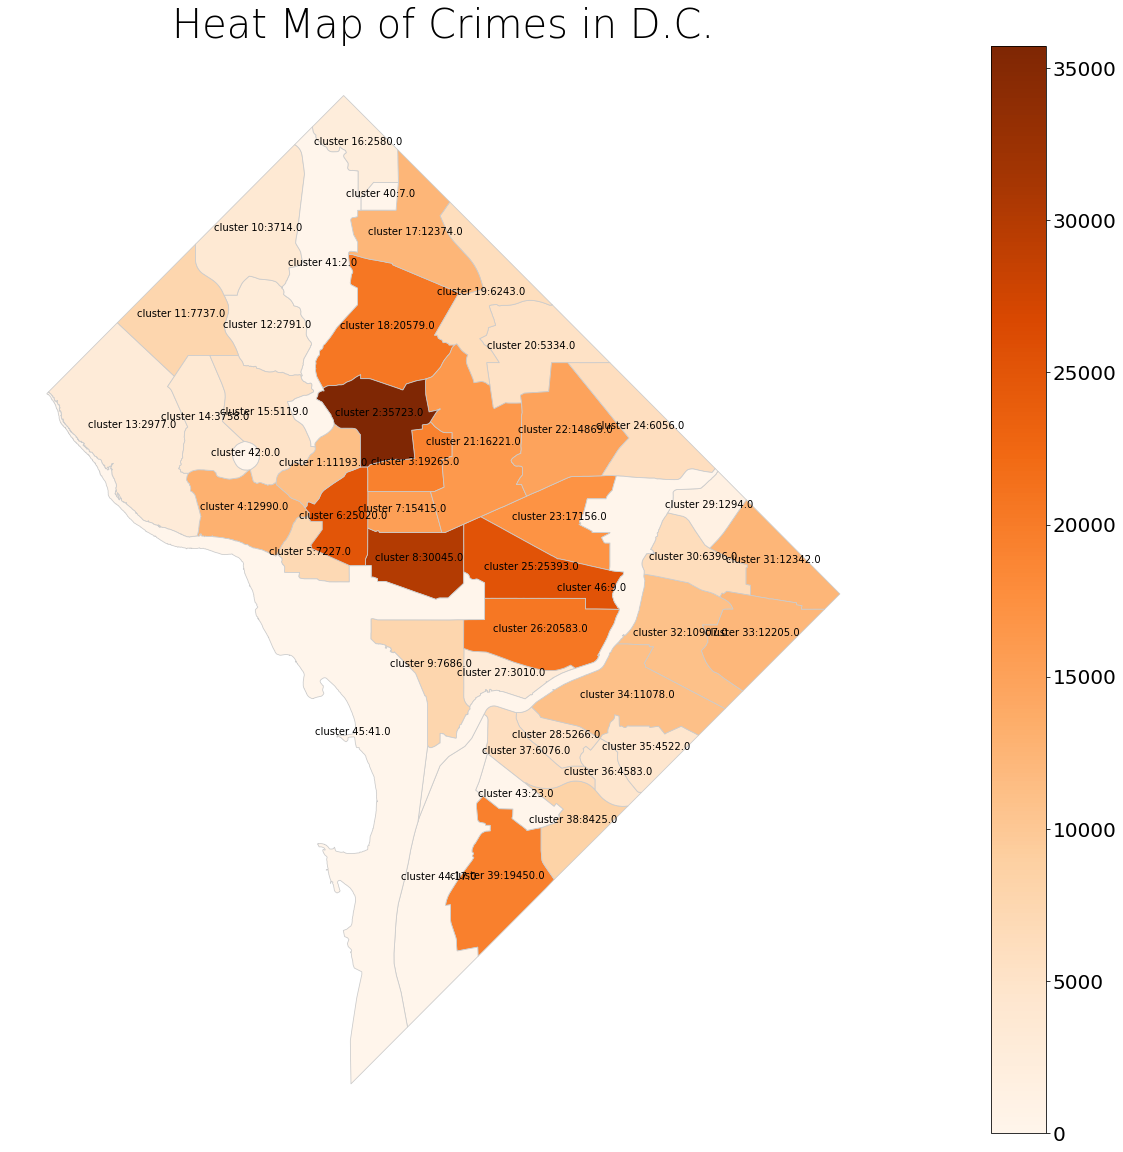

In [28]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import pandas as pd

dc_map = gpd.read_file('data/Neighborhood_Clusters.shp')
dc_map['neighbourhood'] = dc_map['NAME'].str.lower()

# dc_map.sample(5)
crimes = CRIMES.drop_duplicates(inplace=False)
data = crimes[crimes['NEIGHBORHOOD_CLUSTER'].notna()]
data['count_by_cluster'] = 1
dataByNeighbourhood = data.groupby('NEIGHBORHOOD_CLUSTER').count()[['count_by_cluster']].reset_index()
dataByNeighbourhood['NEIGHBORHOOD_CLUSTER'] = dataByNeighbourhood['NEIGHBORHOOD_CLUSTER'].str.lower()
dataByNeighbourhood.sort_values('count_by_cluster', ascending=False).head(10)


merged = dc_map.set_index('neighbourhood').join(dataByNeighbourhood.set_index('NEIGHBORHOOD_CLUSTER'))
merged = merged.reset_index()
mrged = merged.fillna(0)
# print("Merged: ===============\n", merged)
# merged[['neighbourhood', 'FIELD_11', 'FIELD_12', 'geometry', 'count']].sample(5)

fig, ax = plt.subplots(1, figsize=(40, 20))
ax.axis('off')
ax.set_title('Heat Map of Crimes in D.C.', fontdict={'fontsize': '40', 'fontweight' : '3'})

color = 'Oranges'
vmin, vmax = 0, max(merged['count_by_cluster'])
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)

ax = merged.plot('count_by_cluster', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20))

merged.apply(lambda x: ax.annotate(s=f"{x['neighbourhood']}:{x['count_by_cluster']}", xy=x.geometry.centroid.coords[0], ha='center'),axis=1)

plt.show()

/home/wycer/miniconda3/envs/bigdata/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
<ipython-input-30-38327bf728e3>:136: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  merged.apply(lambda x: ax.annotate(s=f"{x['neighbourhood']}:{int(x['type'])}", xy=x.geometry.centroid.coords[0], ha='center'),axis=1)


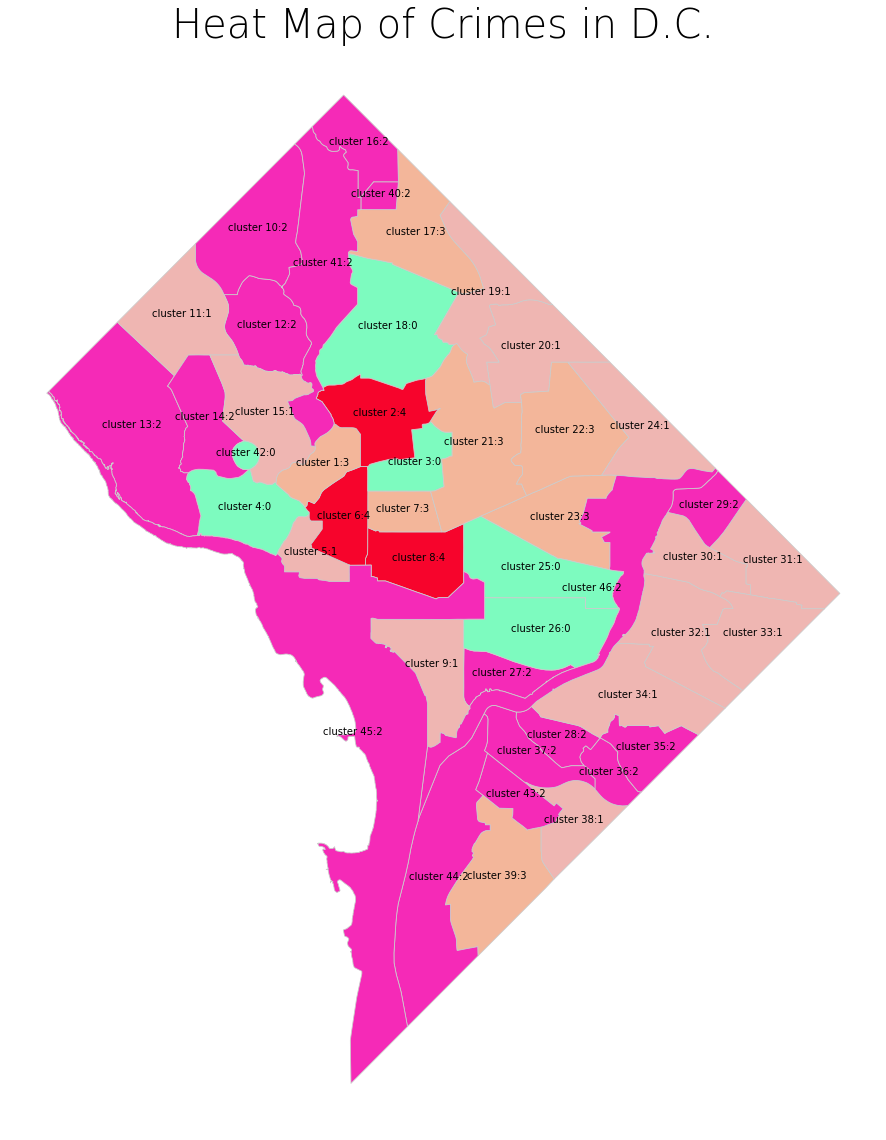

In [30]:
def rand_cmap(nlabels, type='bright', first_color_black=True, last_color_black=False, verbose=True):
    """
    Creates a random colormap to be used together with matplotlib. Useful for segmentation tasks
    :param nlabels: Number of labels (size of colormap)
    :param type: 'bright' for strong colors, 'soft' for pastel colors
    :param first_color_black: Option to use first color as black, True or False
    :param last_color_black: Option to use last color as black, True or False
    :param verbose: Prints the number of labels and shows the colormap. True or False
    :return: colormap for matplotlib
    """
    from matplotlib.colors import LinearSegmentedColormap
    import colorsys
    import numpy as np


    if type not in ('bright', 'soft'):
        print ('Please choose "bright" or "soft" for type')
        return

    if verbose:
        print('Number of labels: ' + str(nlabels))

    # Generate color map for bright colors, based on hsv
    if type == 'bright':
        randHSVcolors = [(np.random.uniform(low=0.0, high=1),
                          np.random.uniform(low=0.2, high=1),
                          np.random.uniform(low=0.9, high=1)) for i in range(nlabels)]

        # Convert HSV list to RGB
        randRGBcolors = []
        for HSVcolor in randHSVcolors:
            randRGBcolors.append(colorsys.hsv_to_rgb(HSVcolor[0], HSVcolor[1], HSVcolor[2]))

        if first_color_black:
            randRGBcolors[0] = [0, 0, 0]

        if last_color_black:
            randRGBcolors[-1] = [0, 0, 0]

        random_colormap = LinearSegmentedColormap.from_list('new_map', randRGBcolors, N=nlabels)

    # Generate soft pastel colors, by limiting the RGB spectrum
    if type == 'soft':
        low = 0.6
        high = 0.95
        randRGBcolors = [(np.random.uniform(low=low, high=high),
                          np.random.uniform(low=low, high=high),
                          np.random.uniform(low=low, high=high)) for i in range(nlabels)]

        if first_color_black:
            randRGBcolors[0] = [0, 0, 0]

        if last_color_black:
            randRGBcolors[-1] = [0, 0, 0]
        random_colormap = LinearSegmentedColormap.from_list('new_map', randRGBcolors, N=nlabels)

    # Display colorbar
    if verbose:
        from matplotlib import colors, colorbar
        from matplotlib import pyplot as plt
        fig, ax = plt.subplots(1, 1, figsize=(15, 0.5))

        bounds = np.linspace(0, nlabels, nlabels + 1)
        norm = colors.BoundaryNorm(bounds, nlabels)

        cb = colorbar.ColorbarBase(ax, cmap=random_colormap, norm=norm, spacing='proportional', ticks=None,
                                   boundaries=bounds, format='%1i', orientation=u'horizontal')

    return random_colormap
# 做一个地域的分类（使用地域的犯罪情况）
# Test GEO
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import pandas as pd

dc_map = gpd.read_file('data/Neighborhood_Clusters.shp')
dc_map['neighbourhood'] = dc_map['NAME'].str.lower()

# dc_map.sample(5)

crimes = CRIMES.drop_duplicates(inplace=False)
data = crimes[crimes['NEIGHBORHOOD_CLUSTER'].notna()]
data = data[['NEIGHBORHOOD_CLUSTER', 'offensekey']]
data = pd.get_dummies(data, columns=["offensekey"])

data = data.groupby('NEIGHBORHOOD_CLUSTER').sum().reset_index()
data_set = data.drop(columns=['NEIGHBORHOOD_CLUSTER'], inplace=False)
data_set.head(10)

# dataByNeighbourhood = data.groupby('NEIGHBORHOOD_CLUSTER').count()[['count_by_cluster']].reset_index()
# dataByNeighbourhood['NEIGHBORHOOD_CLUSTER'] = dataByNeighbourhood['NEIGHBORHOOD_CLUSTER'].str.lower()
# data_set.sort_values('NEIGHBORHOOD_CLUSTER', ascending=False).head(100)

# data_set = data[['NEIGHBORHOOD_CLUSTER']]
# snapshot(data_set)
# # print()

import pandas as pd
from sklearn import cluster
model = cluster.KMeans(n_clusters=5, max_iter=100, n_jobs=4, init="k-means++")
model.fit(data_set)

r = pd.concat([data, pd.Series(model.labels_, index=data.index)], axis=1)
r.columns = list(data.columns) + ['type']

r.head(10)

# ['NEIGHBORHOOD_CLUSTER', 'CENSUS_TRACT', 'offensegroup', 'LONGITUDE',
#        'END_DATE', 'offense-text', 'SHIFT', 'YBLOCK', 'DISTRICT', 'WARD',
#        'YEAR', 'offensekey', 'BID', 'sector', 'PSA', 'ucr-rank', 'BLOCK_GROUP',
#        'VOTING_PRECINCT', 'XBLOCK', 'BLOCK', 'START_DATE', 'CCN', 'OFFENSE',
#        'OCTO_RECORD_ID', 'ANC', 'REPORT_DAT', 'METHOD', 'location', 'LATITUDE',
#        'count_by_cluster'],

merged = dc_map.set_index('neighbourhood').join(r.set_index('NEIGHBORHOOD_CLUSTER'))
merged = merged.reset_index()
merged = merged.fillna(0)
# print("Merged: ===============\n", merged)
# merged[['neighbourhood', 'FIELD_11', 'FIELD_12', 'geometry', 'count']].sample(5)

fig, ax = plt.subplots(1, figsize=(40, 20))
ax.axis('off')
ax.set_title('Heat Map of Crimes in D.C.', fontdict={'fontsize': '40', 'fontweight' : '3'})

vmin, vmax = 0, max(merged['type'])
# cmap = matplotlib.colors.ListedColormap ( numpy.random.rand ( 256,3))
vals = np.linspace(0,1,256)
np.random.shuffle(vals)
sm = rand_cmap(100, type='bright', first_color_black=False, last_color_black=False, verbose=False)
# cbar = fig.colorbar(sm)
# cbar.ax.tick_params(labelsize=20)

ax = merged.plot('type', cmap=sm, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20))

merged.apply(lambda x: ax.annotate(s=f"{x['neighbourhood']}:{int(x['type'])}", xy=x.geometry.centroid.coords[0], ha='center'),axis=1)
plt.show()

In [75]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import pandas as pd
dc_map = gpd.read_file('data/Neighborhood_Clusters.shp')
dc_map['neighbourhood'] = dc_map['NAME'].str.lower()


properties = PROPERTIES.drop(columns=['CITY', 'STATE', 'X', 'Y', 'SOURCE'])
properties = properties.dropna(axis=0, how='any', subset=['PRICE'])
properties = properties.drop(properties[properties['QUALIFIED'] == 'U'].index)
properties = properties.drop(columns=['QUALIFIED'])
properties.set_index('index')

# properties = properties[:25]
print(len(properties))

properties['neighbourhood'] = ""

cnt = 0

def find(x):
    global cnt
    p = Point(x["LONGITUDE"], x["LATITUDE"])
    # print(x)
    cnt += 1
    if cnt % 1000 == 0:
        print(cnt)
    try:
        # print("nmd", len(n))
        # print(x['index'], dc_map[dc_map['geometry'].contains(p)]['neighbourhood'])
        # print(dc_map[dc_map['geometry'].contains(p)])
        # y = dc_map[dc_map['geometry'].contains(p)]
        # print(type(y))
        # print(y)
        return dc_map[dc_map['geometry'].contains(p)]['neighbourhood'].iloc[0]
    except Exception as e:
        print(x)
        print(e)
        
properties['neighbourhood'] = properties.apply(lambda x: find(x) ,axis=1)

properties.head(25)


76233
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000


,index,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,QUADRANT,neighbourhood
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,38.914680,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW,cluster 6
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,38.914684,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW,cluster 6
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,38.914683,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW,cluster 6
5,5,3,2,Hot Water Rad,Y,1.0,10,5,1913.0,NaN,...,38.914331,-77.039715,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW,cluster 6
7,7,3,1,Hot Water Rad,Y,2.0,8,4,1906.0,2011.0,...,38.915408,-77.040129,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,NW,cluster 6
8,8,3,1,Warm Cool,Y,2.0,7,3,1908.0,2008.0,...,38.915017,-77.039903,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,NW,cluster 6
14,14,3,1,Warm Cool,Y,2.0,5,3,1917.0,2000.0,...,38.915038,-77.039716,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,NW,cluster 6
16,16,3,1,Warm Cool,Y,1.0,8,3,1908.0,2006.0,...,38.915018,-77.039844,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,NW,cluster 6
19,19,3,1,Hot Water Rad,Y,2.0,9,3,1908.0,2013.0,...,38.915019,-77.040138,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,NW,cluster 6
22,22,1,0,Forced Air,Y,1.0,6,3,1880.0,2010.0,...,38.911368,-77.033925,Old City 2,040 E Old City 2,5201.0,005201 4003,Ward 2,208,NW,cluster 7


In [76]:
properties.to_csv("data/properties.csv")

In [188]:

crimes = CRIMES.drop_duplicates(inplace=False)
crimes = crimes[crimes['NEIGHBORHOOD_CLUSTER'].notna()]
crimes = crimes[['NEIGHBORHOOD_CLUSTER', 'offensegroup', 'REPORT_DAT']]
crimes = pd.get_dummies(crimes, columns=["offensegroup"])
crimes['DATE'] = pd.to_datetime(crimes['REPORT_DAT'], utc=True)
crimes['YEAR'] = crimes['DATE'].dt.year
crimes = crimes.groupby(['NEIGHBORHOOD_CLUSTER', 'YEAR']).sum()

crimes.head()

offensegroup_property  offensegroup_violent
NEIGHBORHOOD_CLUSTER YEAR                                             
cluster 1            2008                  776.0                 189.0
                     2009                  701.0                 163.0
                     2010                  723.0                 142.0
                     2011                  852.0                 167.0
                     2012                  804.0                 160.0

In [111]:
properties['SALE_DATE'] = pd.to_datetime(properties['SALEDATE'], utc=True)
properties['YEAR'] = properties['SALE_DATE'].dt.year

properties.head()

,index,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,QUADRANT,neighbourhood,SALE_DATE,YEAR
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW,cluster 6,2003-11-25 00:00:00+00:00,2003
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW,cluster 6,2016-06-21 00:00:00+00:00,2016
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW,cluster 6,2006-07-12 00:00:00+00:00,2006
5,5,3,2,Hot Water Rad,Y,1.0,10,5,1913.0,NaN,...,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW,cluster 6,2010-02-26 00:00:00+00:00,2010
7,7,3,1,Hot Water Rad,Y,2.0,8,4,1906.0,2011.0,...,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,NW,cluster 6,2011-09-29 00:00:00+00:00,2011


In [198]:
data_set = pd.merge(properties, crimes,  how='left', left_on=['neighbourhood','YEAR'], right_on = ['NEIGHBORHOOD_CLUSTER','YEAR'])

data_set[['offensegroup_property', 'offensegroup_violent']] = data_set[['offensegroup_property', 'offensegroup_violent']].fillna(value=0)

data_set = data_set.drop(columns=['SALE_DATE', 'YEAR', 'QUADRANT', 'neighbourhood', 'CENSUS_TRACT', 'CENSUS_BLOCK', 'ZIPCODE', 'USECODE', 'CMPLX_NUM', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD', 'NATIONALGRID', 'FULLADDRESS', 'GIS_LAST_MOD_DTTM', 'WARD'])

data_set = data_set.drop(columns=['LATITUDE', 'LONGITUDE'])

data_set = data_set.drop(columns=['INTWALL', 'EXTWALL', 'STYLE', 'STORIES', 'SALEDATE', 'ROOF', 'STRUCT', 'BLDG_NUM'])

data_set = data_set.drop(columns=['LIVING_GBA', 'SQUARE'])

data_set = data_set.drop(columns=['HEAT'])
data_set['GRADE'] = data_set['GRADE'].map({
    "Average": 1,
    "Above Average": 2,
    "Good Quality": 3,
    "Very Good": 4,
    "Excellent": 5,
    "Superior": 6,
    "Exceptional-A": 7,
    "Exceptional-B": 8,
    "Exceptional-C": 9,
    "Exceptional-D": 10,
    "Fair Quality": 0,
    "Low Quality": -1
})

# print(data_set.columns)
# data_set['CNDTN'].value_counts()
data_set['CNDTN'] = data_set['CNDTN'].map({
    "Good": 2,
    "Average": 3,
    "Very Good": 4,   
    "Excellent": 5,  
    "Fair": 1, 
    "Poor": 0       
})
data_set['AC'] = data_set['AC'].map({
    "Y": 1,
    "N": 0      
})

data_set = data_set.dropna()

train_x = data_set.drop(columns=['PRICE'])
train_y = data_set[['PRICE']]


/home/wycer/miniconda3/envs/bigdata/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
[ 425831.01724367  869393.01693655 1167170.87442494  297021.52664847
  294355.15116158  725002.96804351  509750.79573746  500527.22804395
  296193.47726165  227935.27438795  212817.75743329  190226.27980905
  203636.00911259  314339.45170315  342924.03861714  289131.9073548
   96286.36262182  112021.84642343  205535.61877857  292864.00953202
  144245.27446595   62910.2329753    78866.39036176   78866.39036176
  171405.10693694  162066.62945238  341634.24041114   80667.67869272
  281616.20687475  315207.64793333  113559.73954101  120346.44864068
  125188.70167859  346008.04877391  353132.93852057  228600.33857026
  284077.16851076  319784.33899666  351131.56008719  192135.7197303
  221257.64987541  271019.552753

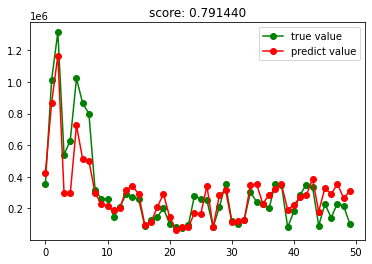

In [223]:

x_train, y_train = train_x[:-50], train_y[:-50] #数据前两列是x1,x2 第三列是y,这里的y有随机噪声
x_test ,y_test = train_x[-50:], train_y[-50:] # 同上,不过这里的y没有噪声

###########2.回归部分##########
def try_different_method(model):
    model.fit(x_train,y_train)
    score = model.score(x_test, y_test)
    result = model.predict(x_test)
    print(result)
    plt.figure()
    plt.plot(np.arange(len(result)), y_test,'go-',label='true value')
    plt.plot(np.arange(len(result)),result,'ro-',label='predict value')
    plt.title('score: %f'%score)
    plt.legend()
    plt.show()


###########3.具体方法选择##########
####3.1决策树回归####
from sklearn import tree
model_DecisionTreeRegressor = tree.DecisionTreeRegressor()
####3.2线性回归####
from sklearn import linear_model
model_LinearRegression = linear_model.LinearRegression()
####3.3SVM回归####
from sklearn import svm
model_SVR = svm.SVR()
####3.4KNN回归####
from sklearn import neighbors
model_KNeighborsRegressor = neighbors.KNeighborsRegressor()
####3.5随机森林回归####
from sklearn import ensemble
model_RandomForestRegressor = ensemble.RandomForestRegressor(n_estimators=20)#这里使用20个决策树
####3.6Adaboost回归####
from sklearn import ensemble
model_AdaBoostRegressor = ensemble.AdaBoostRegressor(n_estimators=100)#这里使用50个决策树
####3.7GBRT回归####
from sklearn import ensemble
model_GradientBoostingRegressor = ensemble.GradientBoostingRegressor(n_estimators=100)#这里使用100个决策树
####3.8Bagging回归####
from sklearn.ensemble import BaggingRegressor
model_BaggingRegressor = BaggingRegressor()
####3.9ExtraTree极端随机树回归####
from sklearn.tree import ExtraTreeRegressor
model_ExtraTreeRegressor = ExtraTreeRegressor()
try_different_method(model_GradientBoostingRegressor)

In [ ]:
def group(plots):
    bunch = GGBunch()
    for idx, p in enumerate(plots):
        x = (idx % 2) * 450
        y = int(idx / 2) * 350
        bunch.add_plot(p, x, y)

    return bunch

corr_plot(mpg_df).tiles().labels().build() + ggtitle("Tiles and labels")


In [ ]:
# Test GEO
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import pandas as pd

dc_map = gpd.read_file('bigdata/Neighborhood_Clusters.shp')
# dc_map.plot()
print(dc_map)

crs={'init':'epsg:4326'}
geometry=[Point(xy) for xy in zip(crimes["LONGITUDE"], crimes["LATITUDE"])]
geodata=gpd.GeoDataFrame(crimes,crs=crs, geometry=geometry)

fig, ax = plt.subplots(figsize=(7,7))

dc_map.plot(ax=ax, facecolor='Grey', edgecolor='k',alpha=1,linewidth=1,cmap="cividis")
#You can use different 'cmaps' such as jet, plasm,magma, infereno,cividis, binary...(I simply chose cividis)
geodata.plot(ax=ax, color='red', markersize=5)
fig.suptitle('Crimes', fontsize=12)
ax.set_xlabel('Longitude', fontsize=10)
ax.set_ylabel('Latitude', fontsize='medium')